In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import requests

## First we are going to make all the posible calls to our API

#### We are going to stock all the calls as variables and transform them into a data frame

All the characters:

In [9]:
char = requests.get('http://127.0.0.1:5000/characters')

In [13]:
df_char = pd.DataFrame(char.json())
df_char.head()

,idCharacter,Character_name
0,33,Agency Director
1,35,Alan
2,27,Alien Doctor
3,17,All Mortys
4,14,All Ricks


All the phrases:

In [14]:
phr = requests.get('http://127.0.0.1:5000/phrases')
df_phr = pd.DataFrame(phr.json())
df_phr.head()

,idPhrase,Phrase,Character_idCharacter,Episode_idEpisode
0,1,Morty! You gotta come on. Jus ... you gotta co...,1,1
1,2,"What, Rick? What’s going on?",2,1
2,3,"I got a surprise for you, Morty.",1,1
3,4,It s the middle of the night. What are you tal...,2,1
4,5,"Come on, I got a surprise for you. Come on, h...",1,1


All the episodes:

In [15]:
ep = requests.get('http://127.0.0.1:5000/episodes')
df_ep = pd.DataFrame(ep.json())
df_ep.head()

,idEpisode,Episode_name
0,1,Pilot
1,2,Lawnmower Dog
2,3,Rick Potion 9
3,4,A Rickle in Time
4,5,The Wedding Squanchers


All the phrases of a given episode:

In [70]:
phr_ep = requests.get(f'http://127.0.0.1:5000/phrases_ep?episode=Pilot')
df_phr_ep = pd.DataFrame(phr_ep.json())
df_phr_ep.head()

,Episode_name,phrase
0,Pilot,Morty! You gotta come on. Jus ... you gotta co...
1,Pilot,"What, Rick? What’s going on?"
2,Pilot,"I got a surprise for you, Morty."
3,Pilot,It s the middle of the night. What are you tal...
4,Pilot,"Come on, I got a surprise for you. Come on, h..."


All the phrases of a given character:

In [18]:
phr_char = requests.get('http://127.0.0.1:5000/phrases/Rick')
df_phr_char = pd.DataFrame(phr_char.json())
df_phr_char.head()

,Character_name,phrase
0,Rick,Morty! You gotta come on. Jus ... you gotta co...
1,Rick,"I got a surprise for you, Morty."
2,Rick,"Come on, I got a surprise for you. Come on, h..."
3,Rick,"We gotta go, gotta get outta here, come on. Go..."
4,Rick,"What do you think of this... flying vehicle, M..."


#### Now we are going to add some new data with the post method:

- First we create a dictionary for the insertion (it is specified in the documentation)

In [20]:
data = {
    'character': 'Jorge',
    'episode': 'Jorge ended up loving SQL',
    'phrase': 'Oh wow, this is exciting...when it works'
}

In [22]:
posting = requests.post('http://127.0.0.1:5000/newdata', data=data)

In [24]:
posting #to check if it is done

<Response [200]>

#### Lastsly, we move onto the NLP endpoints:

Global sentiment analysis, the gerenal polarity of Rick and Morty's season 1:

In [28]:
global_sentiment = requests.get('http://127.0.0.1:5000/sentiment')

In [30]:
global_sentiment.content

b'0.04419167704978638'

Polarity of a given character throughout the season 1:
- lets do all of them because we want to do some graphs later on
    - Rick, Morty, Beth, Summer, Jerry

In [84]:
rick_sentiment = requests.get('http://127.0.0.1:5000/phrases/Rick/sentiment')
rick = rick_sentiment.json()
rick

0.04388320203071882

In [85]:
morty_sentiment = requests.get('http://127.0.0.1:5000/phrases/Morty/sentiment')
morty = morty_sentiment.json()
morty

0.04152290740787451

In [86]:
beth_sentiment = requests.get('http://127.0.0.1:5000/phrases/Beth/sentiment')
beth = beth_sentiment.json()
beth

0.045752145581691016

In [89]:
jerry_sentiment = requests.get('http://127.0.0.1:5000/phrases/Jerry/sentiment')
jerry = jerry_sentiment.json()
jerry

0.06696694659242372

In [87]:
summer_sentiment = requests.get('http://127.0.0.1:5000/phrases/Summer/sentiment')
summer = summer_sentiment.json()
summer

0.021907981229824014

Polarity of a given episode:
- we are going to do a call for every episode

- let's write a function to do this, as well as a for loop iterting through the list of episodesand appending all the values to a list

In [78]:
def call_ep(episode):
    '''
    Calls the API for the polarity of a given episode
    Args:
        episode(str)
    Returns
        json: the polarity value
    '''
    sentiment = requests.get(f'http://127.0.0.1:5000/phrases_ep/sentiment?episode={episode}')
    return sentiment.json()

In [38]:
episodes_list = ['Pilot', 'Lawnmower Dog', 'Rick Potion 9', 'A Rickle in Time', 'The Wedding Squanchers', 'Get Schwifty', 'Interdimensional Cable 2  Tempting Fate', 'The Rickshank Rickdemption', 'Pickle Rick', 'Vindicators 3  The Return of Worldender', 'Tales From the Citadel']

In [76]:
list_ = []
for i in episodes_list:
    ep = call_ep(i)
    list_.append(ep)

In [77]:
list_

[0.05496653042564951,
 0.00609888783393385,
 0.12013266417678181,
 0.052057930495430504,
 0.10729166666666667,
 0.05908174063026703,
 0.06321481717687075,
 0.01908642974758224,
 0.016319403450085267,
 0.055405328798185945,
 0.049539473684210536]

# Let's plot all the data to make some conclussions

### We are going to do this by using the alredy created data frames or by creating new ones

First we create a data frame containig the polarity of each character through all season 1

In [98]:
characters = ['Rick', 'Morty', 'Beth', 'Jerry', 'Summer']
sents = [rick, morty, beth, jerry, summer]
char_sents = {'character':characters,
             'polarity':sents}

In [99]:
df_char_sents = pd.DataFrame(char_sents)
df_char_sents

,character,polarity
0,Rick,0.043883
1,Morty,0.041523
2,Beth,0.045752
3,Jerry,0.066967
4,Summer,0.021908


Now we create another data frame containing the polarity of each episode of the season 1

In [100]:
ep_sents = {'episode':episodes_list,
           'polarity': list_}
df_ep_sents = pd.DataFrame(ep_sents)
df_ep_sents.head()

,episode,polarity
0,Pilot,0.054967
1,Lawnmower Dog,0.006099
2,Rick Potion 9,0.120133
3,A Rickle in Time,0.052058
4,The Wedding Squanchers,0.107292


### Now its time to plot!

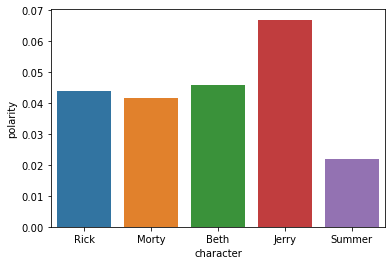

In [102]:
sns.barplot(data=df_char_sents, x=df_char_sents.character, y=df_char_sents.polarity);

We can easily say that Jerry is the most positive character of the 5 main characters.

Summer is the most negative person.

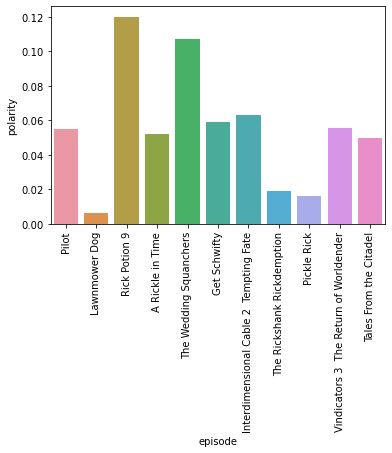

In [114]:
ax = sns.barplot(data=df_ep_sents, x=df_ep_sents.episode, y=df_ep_sents.polarity)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

The most positive episode is 'Rick Potion 9' and the most negative is 'Lawnmower Dog'

<ipython-input-119-544e0e5d31f5>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 0);


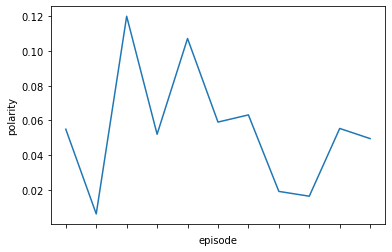

In [119]:
ax2 = sns.lineplot(data=df_ep_sents, x=df_ep_sents.episode, y=df_ep_sents.polarity)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 0);

Here we just observe the evolution of the polarity throghout the first season

# FINAL CONCLUSSIONS

As we can see, Rick and Morty's season one is not as dramatic as we could've thought in the first place.

The polarity is a number which goes between -1 and 1, and as we can observe it never gets bellow 0, neither for the episodes or the characters.

As concluded before Jerry is the most positive character amongst the five main characters and Sumer is the least positive character.

Episode wise talking, again, as conclude before the episode called 'Rick Potion 9' is the most positive episode and 'Lawnmower Dog' is the least positive one, almost being neutral.

#### Does this make any sense?

- If we know a little bit about Rick and Morty we may say that this is quite correct. Summer is a very low and not very positive person, as well as Jerry although being a 'beaten-up' person, he may be the most positive person due to his innocence way of talking.

The polarity throughout the season one does not follow a regular pattern, this meaning starting low and ending high or viceversa.

It just has a middle season high and then it goes back to 'normal', kind of were it started.